In [1]:
from read_mias import *
from denoise import *
from orient import *
from rm_pec import *
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.signal import convolve2d
from rotations import *
from find_points import *
from mutual_info import * 


path = 'mias_data'
data = read_mias(path)
oriented = reorient_all(data)
denoised = denoise_all(oriented)
#pec_rmd = rm_pec_all(denoised)
rotated = rotate_all(denoised)


In [2]:
idx = 6
num_pairs = 161

In [ ]:


mi_oriented = []

for i in range(161):
    a = oriented[2*i].flatten()
    b = oriented[2*i + 1].flatten()


    mi = mutual_information_2d(a,b)
    mi_oriented.append(mi)
    



NameError: name 'mutual_information_2d' is not defined

In [23]:
print(mi_oriented[idx])

0.9536786289203549


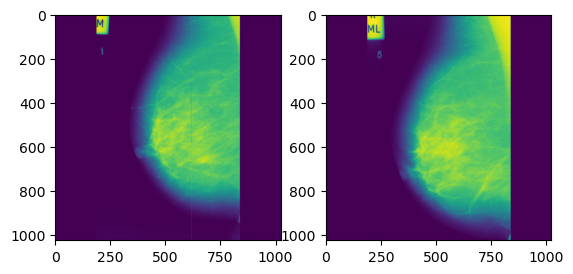

In [29]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(oriented[2 * idx])
axs[1].imshow(oriented[(2 * idx)+1])

In [2]:
mi_denoised = []

for i in range(161):
    a = denoised[2*i].flatten()
    b = denoised[2*i + 1].flatten()


    mi = mutual_information_2d(a,b)
    mi_denoised.append(mi)
    

In [10]:
idx = 20

In [11]:
print(mi_denoised[idx])

1.2265819530168143


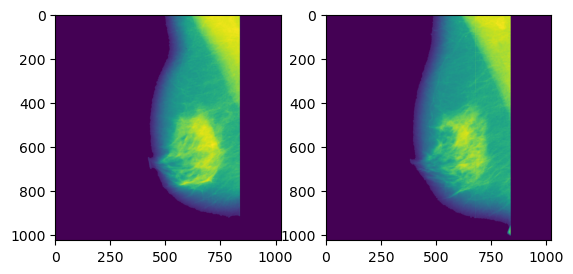

In [12]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(denoised[2 * idx])
axs[1].imshow(denoised[(2 * idx)+1])

[]

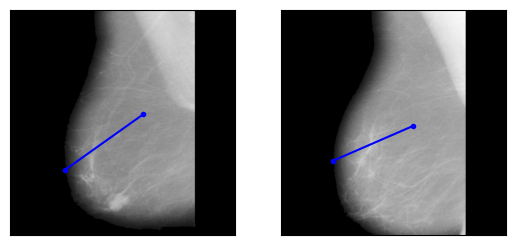

In [56]:
idx = 2

pair = np.zeros((2, 1024, 1024))
pair[0] = denoised[2*idx]
pair[1] = denoised[2*idx + 1]

nps = np_all(pair)
cps = cp_all(pair)

fig, axs = plt.subplots(1,2)
axs[0].imshow(pair[0],cmap = 'gray')
axs[0].plot([nps[0][0], cps[0][0]], [nps[0][1], cps[0][1]], marker = '.', color = 'b')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(pair[1], cmap = 'gray')
axs[1].plot([nps[1][0], cps[1][0]], [nps[1][1], cps[1][1]], marker = '.', color = 'b')
axs[1].set_xticks([])
axs[1].set_yticks([])

[]

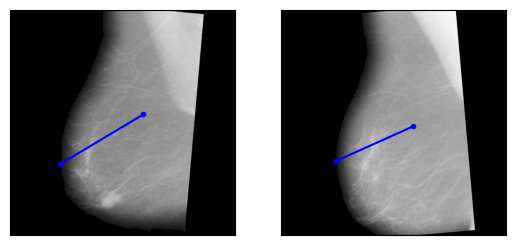

In [55]:
pair = np.zeros((2, 1024, 1024))
pair[0] = rotated[2*idx]
pair[1] = rotated[2*idx + 1]

nps = np_all(pair)
cps = cp_all(pair)

fig, axs = plt.subplots(1,2)
axs[0].imshow(pair[0],cmap = 'gray')
axs[0].plot([nps[0][0], cps[0][0]], [nps[0][1], cps[0][1]], marker = '.', color = 'b')
axs[1].imshow(pair[1],cmap = 'gray')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].plot([nps[1][0], cps[1][0]], [nps[1][1], cps[1][1]], marker = '.', color = 'b')
axs[1].set_xticks([])
axs[1].set_yticks([])

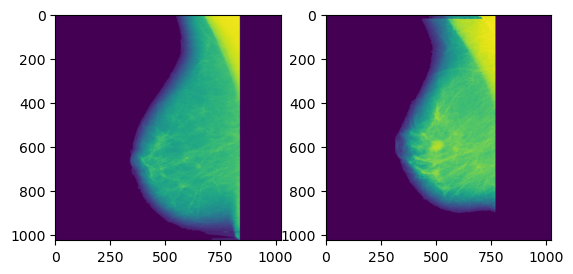

In [35]:
idx = 4
fig, axs = plt.subplots(1,2)
axs[0].imshow(rotated[2 * idx])
axs[1].imshow(rotated[(2 * idx)+1])

In [13]:
mi_rotated = []

for i in range(161):
    a = rotated[2*i].flatten()
    b = rotated[2*i + 1].flatten()


    mi = mutual_information_2d(a,b)
    mi_rotated.append(mi)

In [14]:
print(mi_rotated[idx])

1.1810921899613733


In [ ]:
from scipy.ndimage import shift

In [36]:

def get_best_mi(a,b):
    mi = np.zeros(200)

    for i,x in enumerate(range(-100,100)):
        bshift = shift(b, x)
        mi[i] = mutual_information_2d(a.flatten(),bshift.flatten())

    
    return range(-100,100)[mi.argmax()]


In [43]:
def mi_all(stack):
    shifted = np.empty_like(stack)
    mi_list = []
    num_pairs = stack.shape[0] //2

    for i in range(num_pairs):
        a = stack[int(2*i)]
        b = stack[int(2*i + 1)]

        l = get_best_mi(a,b)

        shifted[int(2*i)] = a
        shifted[int(2*i + 1)] = shift(b, l)

        mi = mutual_information_2d(a.flatten(), shift(b,l).flatten())
        mi_list.append(mi)

    return shifted, mi_list

In [44]:
shifted, mi_list = mi_all(denoised)

In [45]:
print(f'Rotated MI| mean: {np.mean(mi_denoised)} stdev {np.std(mi_denoised)} ')
print(f'Denoised MI| mean: {np.mean(mi_denoised)} stdev {np.std(mi_denoised)} ')
print(f'Aligned MI| mean: {np.mean(mi_list)} stdev {np.std(mi_list)}')

Rotated MI| mean: 0.8585855644273143 stdev 0.18974598223244055 
Denoised MI| mean: 0.8585855644273143 stdev 0.18974598223244055 
Aligned MI| mean: 0.8907150800030523 stdev 0.18014958148217192


[]

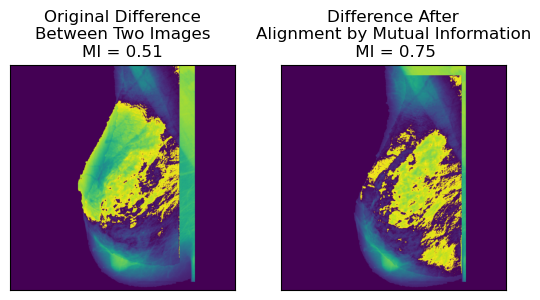

In [69]:
idx = 10
a = rotated[2*idx]
b = rotated[2*idx + 1]
c = shifted[2*idx + 1]
fig, axs = plt.subplots(1,2)
axs[0].imshow(a - b)
axs[1].imshow(a - c)
axs[0].set_title(f'Original Difference\nBetween Two Images\nMI = {mi_denoised[idx]:.2f}')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_title(F'Difference After\nAlignment by Mutual Information\n MI = {mi_list[idx]:.2f}')
axs[1].set_xticks([])
axs[1].set_yticks([])
